# Testing components

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from random import *

## Reshape of bit values after parallel simulation of chromosome

In [179]:
# val = 0b00010010001101000101011001111000
# # print(f'{val}()')
# print(f'{val:032b}')
# print(len(f'{val:032b}'))

# print(list(reversed(range(32))))

def uint32_to_32_bits(unit32_value) -> np.array:
    return np.array([(unit32_value >> i) & 0x00000001 for i in reversed(range(32))], dtype=np.bool_)

def bit_unsqueeze(values: np.array, bits:int = 32):
    if not len(values.shape) == 1:
        raise ValueError('Pass only 1 dim values.')

    vals_reshaped = []
    for val in values:
        print(f'{val:032b}')
        bits = uint32_to_32_bits(val)
        vals_reshaped.append(bits)
        # print(bits[-6:])
    vals_reshaped = np.array(vals_reshaped, dtype=np.bool_)
    return np.array(vals_reshaped, dtype=np.bool_)

def bit_squeeze(values):
    squeezed = []
    for val_id in range(values.shape[-1]):
        # print(val_id)
        value = values[:, val_id]
        # value = values[:, -1]
        # print(value)

        # bit_and = reduce(lambda x, y: x & y, test_list)
        # n_bits = len(value)

        bits = 0
        for i, bit in enumerate(value): # reversed(list(enumerate(value))):
            # print(f'{i=}, {bit=}')
            # bit_increment = bit << i
            # print(f'{bit_increment=}')
            bits |= bit << i
            # print
        print(f'bits: {bits}({bits:06b})')

        squeezed.append(bits)

    return np.array(squeezed, dtype=np.uint32)

vals = np.array([355427, 1234567, 2734567324, 1234569751, 2534561973, 1298767294])
vals_reshaped = bit_unsqueeze(vals)
bit_squeeze(vals_reshaped)

00000000000001010110110001100011
00000000000100101101011010000111
10100010111111100010111110011100
01001001100101100000101000010111
10010111000100100101100010110101
01001101011010011001110110111110
bits: 20(010100)
bits: 40(101000)
bits: 4(000100)
bits: 16(010000)
bits: 40(101000)
bits: 48(110000)
bits: 20(010100)
bits: 56(111000)
bits: 12(001100)
bits: 36(100100)
bits: 36(100100)
bits: 30(011110)
bits: 36(100100)
bits: 13(001101)
bits: 30(011110)
bits: 33(100001)
bits: 34(100010)
bits: 19(010011)
bits: 5(000101)
bits: 50(110010)
bits: 61(111101)
bits: 39(100111)
bits: 14(001110)
bits: 36(100100)
bits: 54(110110)
bits: 1(000001)
bits: 49(110001)
bits: 60(111100)
bits: 36(100100)
bits: 62(111110)
bits: 43(101011)
bits: 27(011011)


array([20, 40,  4, 16, 40, 48, 20, 56, 12, 36, 36, 30, 36, 13, 30, 33, 34,
       19,  5, 50, 61, 39, 14, 36, 54,  1, 49, 60, 36, 62, 43, 27],
      dtype=uint32)

In [92]:
def extract_6bit_segments(uint32_values):
    # Initialize an empty list to hold the 6-bit segments
    segments = []

    # Iterate over each 32-bit integer
    for value in uint32_values:
        # Extract 6-bit segments and append them to the list
        for i in range(5, -1, -1): # Start from the most significant 6 bits and move to the least significant
            segment = (value >> (i * 6)) & 0x3F # Shift right by i*6 bits and mask with 0x3F to get the 6-bit segment
            segments.append(segment)

    return segments

# Example usage
uint32_values = [0x12345678, 0x9ABCDEF0, 0x11223344, 0x55667788, 0x99AABBCC, 0xDDEEFF00]
for val in uint32_values:
    print(f'{val:032b}')
segments = extract_6bit_segments(uint32_values)

print(segments)

00010010001101000101011001111000
10011010101111001101111011110000
00010001001000100011001101000100
01010101011001100111011110001000
10011001101010101011101111001100
11011101111011101111111100000000
[0, 18, 13, 5, 25, 56, 2, 26, 47, 13, 59, 48, 0, 17, 8, 35, 13, 4, 1, 21, 25, 39, 30, 8, 2, 25, 42, 43, 47, 12, 3, 29, 59, 47, 60, 0]


In [88]:
np.array([0, 1, 0, 1, 1], dtype=np.bool_)

array([False,  True, False,  True,  True])

In [93]:
# input is 6 32 bit vaules
input_data = np.array([0x12345678, 0x9ABCDEF0, 0x11223344, 0x99887766, 0x88116677, 0x44662233], dtype=np.uint32)
print(f'input_data: {input_data.shape}, {input_data.dtype}')

segments = np.bitwise_and(input_data[:, None], 0x3f).flatten()
print(f'segments: {segments.shape}, {segments.dtype}')
print(segments)

segments = segments.reshape(-1, 32)
print(f'segments: {segments.shape}, {segments.dtype}')

input_data: (6,), uint32
segments: (6,), uint32
[56 48  4 38 55 51]


ValueError: cannot reshape array of size 6 into shape (32)

## Beta distribution stuff

In [32]:
from scipy.integrate import quad
from scipy.stats import beta
from IPython.display import clear_output
import time

Probability that Candidate1 is better then Candidate 2: -1.9681224582981088e-15


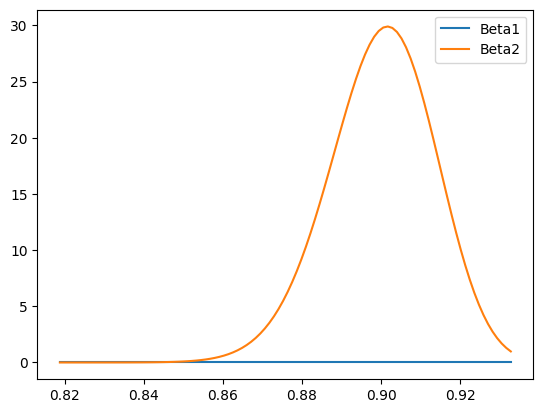

In [28]:

simulated = 500
a1, b1 = make_a_b(simulated, 80)
a2, b2 = make_a_b(simulated, 450)

def diff_pdf(theta):
    return beta.pdf(theta, a2, b2) - beta.pdf(theta, a1, b1)

result, error = quad(diff_pdf, 0, 1)

print(f'Probability that Candidate1 is better then Candidate 2: {result}')

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a1, b1), label='Beta1')
plt.plot(x, beta.pdf(x, a2, b2), label='Beta2')
plt.legend()
plt.show()

clear_output(wait=True) #to clear the output

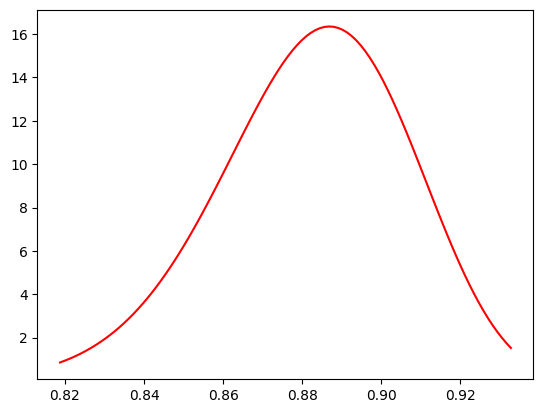

In [18]:
# make linspace from 0 to 1 with 100 values

a, b = 150, 20

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),
       'r', label='beta pdf')
plt.show()

In [14]:
2**16

65536

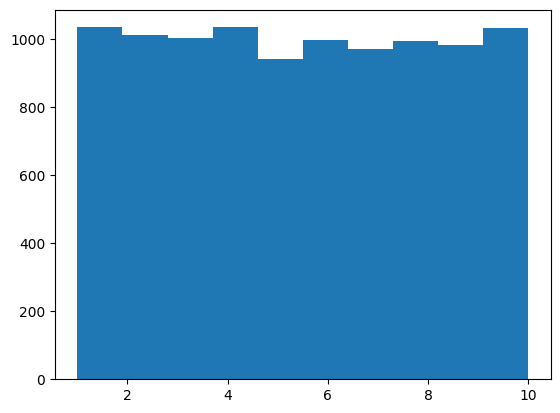

In [26]:
x = []

for _ in range(10_000):
    x.append(randint(1, 10))

plt.hist(x, bins=10)
plt.show()

In [83]:
def make_a_b(sum_, succ):
    return succ, sum_ - succ

def diff_pdf(theta):
    return np.maximum(0, beta.pdf(theta, a2, b2) - beta.pdf(theta, a1, b1))
# def diff_pdf(theta):
#     pdf1 = beta.pdf(theta, a1, b1)
#     pdf2 = beta.pdf(theta, a2, b2)
#     return pdf2 / pdf2 - pdf1

x = np.linspace(0, 1, 1_000)

sum_ = 2
a1, b1 = 1, 1
a2, b2 = 1, 1

for i in range(100):
    if i % 20 == 0:
        # time.sleep(0.5)
        # clear_output(wait=True)

        print(f'sum_:', sum_)
        print(f'{a1=}, {b1=}')
        print(f'{a2=}, {b2=}')
        result, error = quad(diff_pdf, 0, 1)
        print(f'Probability that C1 is better then C2: {result}, error: {error}')
        plt.plot(x, beta.pdf(x, a1, b1), label='Beta1')
        plt.plot(x, beta.pdf(x, a2, b2), label='Beta2')
        diff = np.maximum(0, beta.pdf(x, a2, b2) - beta.pdf(x, a1, b1))
        # diff = beta.pdf(x, a2, b2) ´ - beta.pdf(x, a1, b1))
        plt.plot(x, diff, label='2-1')
        plt.title(f'i: {i}')
        plt.legend()
        plt.show()
        if result > 0.9:
            break


    sum_ += 1
    a1 += int(randint(0, 2) > 0)
    a2 += int(randint(0, 3) > 0)

    a1, b1 = make_a_b(sum_, a1)
    a2, b2 = make_a_b(sum_, a2)


KeyboardInterrupt: 

In [182]:
def diff_pdf(theta, a1, b1, a2, b2):
    return np.maximum(0, beta.pdf(theta, a2, b2) - beta.pdf(theta, a1, b1))

a2=6
b2=2
a1=5
b1=3

result, _ = quad(partial(diff_pdf, a1=a1, b1=b1, a2=a2, b2=b2), 0, 1)
print(f'{a1=}, {b1=}, {result=}')

a1=5, b1=3, result=0.3187447407122985


In [181]:
from functools import partial

def multiply(a, b):
    return a * b

double = partial(multiply, b=2)

result = double(10)
print(result)

20
